## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\kevin\Downloads\global_heat_index.csv")
data.shape

(17520, 11)

In [3]:
data.head(20)


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [4]:
clean1 = data[data['Hour']<6]
clean2 = data[data['Hour']>18]

In [5]:
clean1.shape

(4380, 11)

In [6]:
clean2.shape

(3650, 11)

In [7]:
data.drop(clean1.index,axis=0,inplace=True)

In [8]:
data.drop(clean2.index,axis=0,inplace=True)

In [9]:
data.shape

(9490, 11)

## Input and output data

In [15]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',
       'Solar Radiation (GHI)'],
      dtype='object')

In [26]:
x = data.iloc[0:,0:10]
x

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695
...,...,...,...,...,...,...,...,...,...,...
17510,2012,12,31,14,-8,24.219059,983.661621,10.363324,5.771851,1.837763
17511,2012,12,31,15,-9,22.715263,983.482239,11.240004,8.507614,1.937734
17512,2012,12,31,16,-7,19.968041,983.660339,14.983540,17.507896,2.191131
17513,2012,12,31,17,-5,16.706517,983.768677,21.564891,29.407814,2.675606


In [31]:
y= data.iloc[0:,-1]

In [32]:
y

6          0
7          0
8        159
9        363
10       533
        ... 
17510    553
17511    408
17512    221
17513     16
17514      0
Name: Solar Radiation (GHI), Length: 9490, dtype: int64

In [33]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(x))

In [34]:
x

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046
...,...,...,...,...,...,...,...,...,...,...
9485,1.0,1.0,1.0,0.666667,0.363636,0.406748,0.661102,0.095294,0.015946,0.249092
9486,1.0,1.0,1.0,0.750000,0.345455,0.374816,0.654829,0.104142,0.023550,0.262867
9487,1.0,1.0,1.0,0.833333,0.381818,0.316482,0.661057,0.141926,0.048566,0.297785
9488,1.0,1.0,1.0,0.916667,0.418182,0.247227,0.664845,0.208352,0.081641,0.364545


## Correlation matrix with heatmap

In [43]:
corr_mat = data.corr()

In [36]:
corr_mat

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,-1.206348e-12,-7.235267e-14,-1.408221e-15,-0.139773,0.026887,0.020252,-0.166373,0.011996,0.037455,-0.013891
Month,-1.206348e-12,1.000000e+00,1.189318e-02,2.332832e-15,0.491577,-0.038576,-0.036657,0.460993,-0.102648,-0.216902,-0.090227
Day,-7.235267e-14,1.189318e-02,1.000000e+00,2.843627e-17,-0.017772,-0.011873,0.046708,-0.005074,-0.021712,0.038542,0.011420
Hour,-1.408221e-15,2.332832e-15,2.843627e-17,1.000000e+00,-0.020686,0.269499,-0.183460,-0.211869,0.113641,0.006593,0.040573
Dew Point,-1.397731e-01,4.915774e-01,-1.777210e-02,-2.068626e-02,1.000000,0.198330,-0.587488,0.790023,0.160133,0.072254,-0.024650
Temperature,2.688710e-02,-3.857553e-02,-1.187262e-02,2.694991e-01,0.198330,1.000000,-0.627170,-0.344609,0.431627,0.263510,0.608713
Pressure,2.025241e-02,-3.665724e-02,4.670753e-02,-1.834597e-01,-0.587488,-0.627170,1.000000,-0.244693,-0.428785,-0.435057,-0.144057
Relative Humidity,-1.663735e-01,4.609927e-01,-5.073932e-03,-2.118687e-01,0.790023,-0.344609,-0.244693,1.000000,-0.053618,-0.107921,-0.371410
Wind Direction,1.199631e-02,-1.026477e-01,-2.171216e-02,1.136411e-01,0.160133,0.431627,-0.428785,-0.053618,1.000000,0.207285,0.168475
Wind Speed,3.745498e-02,-2.169017e-01,3.854214e-02,6.593433e-03,0.072254,0.263510,-0.435057,-0.107921,0.207285,1.000000,0.007935


<Axes: >

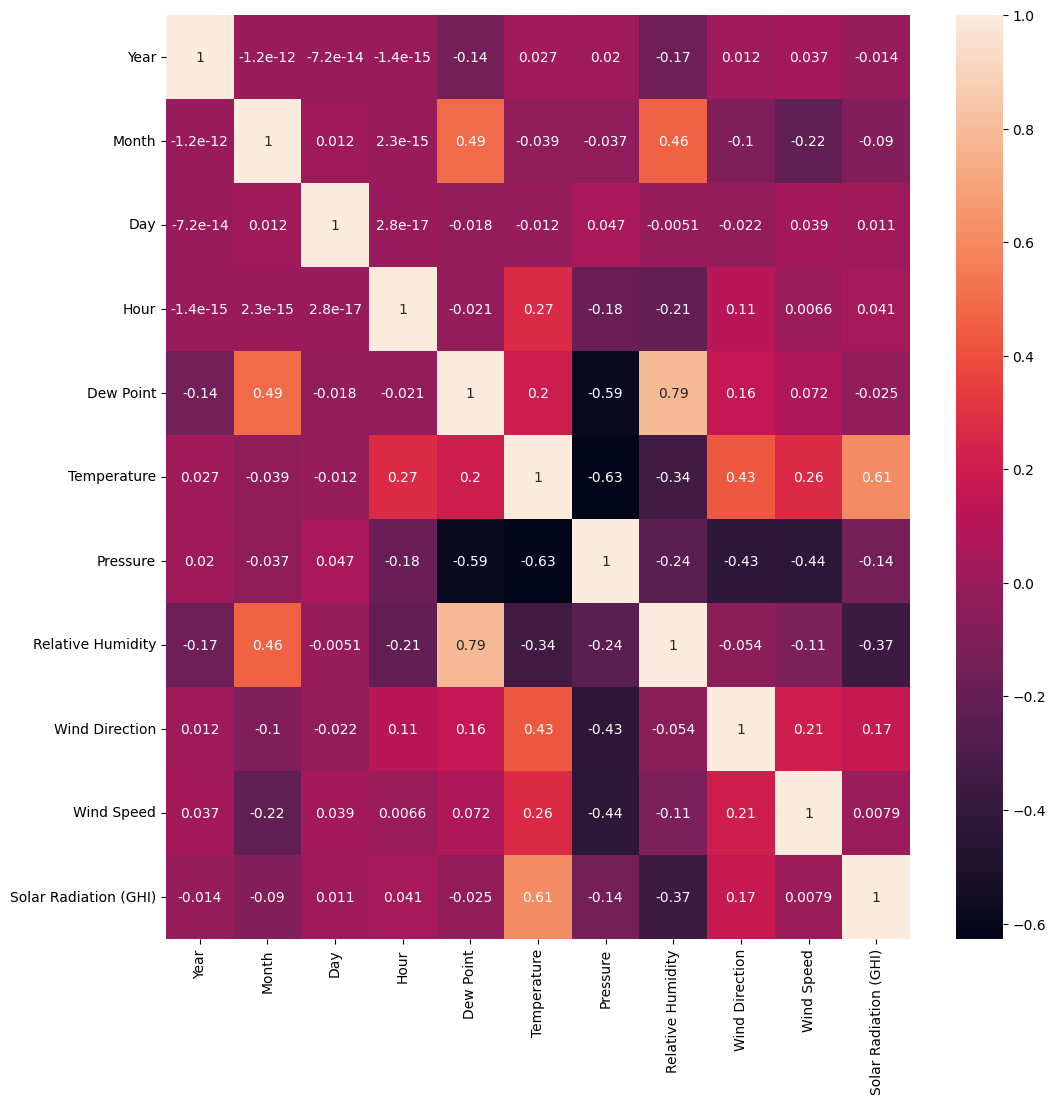

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

<font color="green"> Extra Tree Classifier</font>

## MUCH MORE ACCURATE THAN CORRELATION MATIRX

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [51]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',
       'Solar Radiation (GHI)'],
      dtype='object')

In [52]:
col = ['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',]
feature_imp  = pd.Series(model.feature_importances_,index=col)
feature_imp

Year                 0.026706
Month                0.044600
Day                  0.109140
Hour                 0.110285
Dew Point            0.089896
Temperature          0.139039
Pressure             0.124068
Relative Humidity    0.122831
Wind Direction       0.116193
Wind Speed           0.117244
dtype: float64

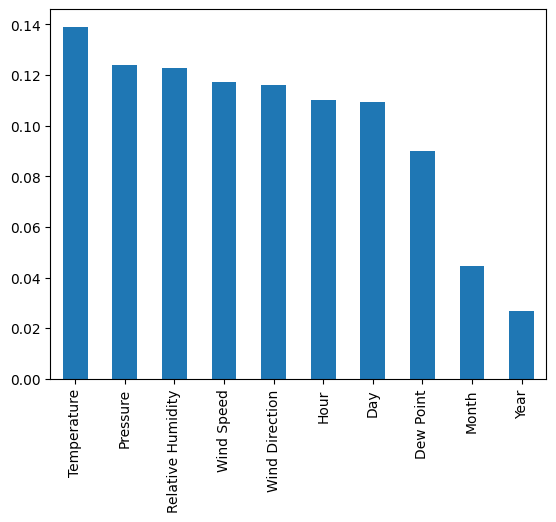

In [56]:
feature_imp.nlargest(10).plot(kind="bar")
plt.show()

## SelectKBestMethod

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [58]:
bestfeatures = SelectKBest(score_func=chi2,k=10).fit(x,y)

In [74]:
scores = pd.DataFrame(bestfeatures.scores_)
columns = pd.DataFrame(col)
feature_scores = pd.concat([columns,scores],axis=1)

In [77]:
feature_scores.columns=['Feature','Scores']

In [78]:
feature_scores

,Feature,Scores
0,Year,504.976721
1,Month,236.303859
2,Day,208.497847
3,Hour,271.978728
4,Dew Point,74.952667
5,Temperature,306.062548
6,Pressure,213.040872
7,Relative Humidity,397.828591
8,Wind Direction,221.823327
9,Wind Speed,148.735716


<Axes: >

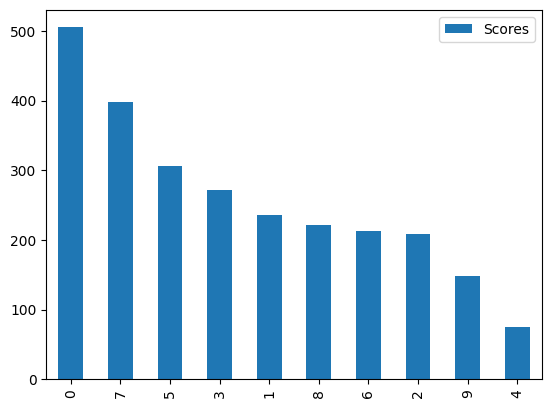

In [83]:
feature_scores.nlargest(10,"Scores").plot(kind="bar")